# Fitting Models Exercise 1

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a quadratic curve

For this problem we are going to work with the following model:

$$ y_{model}(x) = a x^2 + b x + c $$

The true values of the model parameters are as follows:

In [2]:
a_true = 0.5
b_true = 2.0
c_true = -4.0

First, generate a dataset using this model using these parameters and the following characteristics:

* For your $x$ data use 30 uniformly spaced points between $[-5,5]$.
* Add a noise term to the $y$ value at each point that is drawn from a normal distribution with zero mean and standard deviation 2.0. Make sure you add a different random number to each point (see the `size` argument of `np.random.normal`).

After you generate the data, make a plot of the raw data (use points).

In [3]:
def quad(x,a,b,c):
    return a*x**2 + b*x + c

In [4]:
N = 30
xdata = np.linspace(-5,5,N)
dy = 2.0

np.random.seed(0)
ydata = quad(xdata,a_true,b_true,c_true) + np.random.normal(0.0, dy, N)

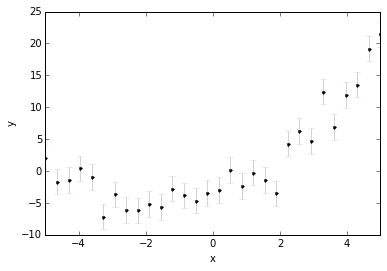

In [5]:
plt.errorbar(xdata,ydata,dy,fmt='.k',ecolor='lightgrey')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-5,5);

In [6]:
assert True # leave this cell for grading the raw data generation and plot

Now fit the model to the dataset to recover estimates for the model's parameters:

* Print out the estimates and uncertainties of each parameter.
* Plot the raw data and best fit of the model.

In [7]:
theta_best, theta_cov = opt.curve_fit(quad, xdata, ydata, sigma=dy)
a_fit = theta_best[0]
b_fit = theta_best[1]
c_fit = theta_best[2]
print('a = {0:.3f} +/- {1:.3f}'.format(a_fit, np.sqrt(theta_cov[0,0])))
print('b = {0:.3f} +/- {1:.3f}'.format(b_fit, np.sqrt(theta_cov[1,1])))
print('c = {0:.3f} +/- {1:.3f}'.format(c_fit, np.sqrt(theta_cov[2,2])))

a = 0.582 +/- 0.049
b = 1.845 +/- 0.130
c = -3.843 +/- 0.581


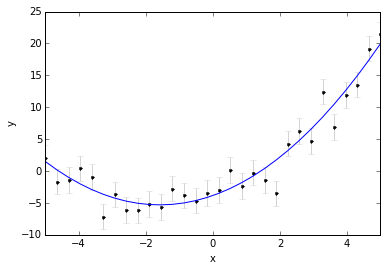

In [8]:
x_fit = np.linspace(-5,5,30)
y_fit = quad(x_fit,a_fit,b_fit,c_fit)

plt.errorbar(xdata,ydata,dy,fmt='.k',ecolor='lightgrey')
plt.plot(x_fit,y_fit)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-5,5);

In [9]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors